In [117]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Poisson
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import NegativeBinomial
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP
from statsmodels.discrete.count_model import ZeroInflatedGeneralizedPoisson
from statsmodels.discrete.count_model import ZeroInflatedPoisson
from statsmodels.miscmodels.count import PoissonZiGMLE
import statsmodels.api as sm

In [24]:
efficacy_data=pd.read_csv(r"C:\Users\sreek\Documents\bayer\Scenario\efficacy.csv")
subject_data=pd.read_csv(r'C:\Users\sreek\Documents\bayer\Scenario\subject.csv')
randomization_data=pd.read_csv(r'C:\Users\sreek\Documents\bayer\Scenario\randomization.csv')
full_data=efficacy_data.set_index('subject').join(subject_data.set_index('subject'))\
.join(randomization_data.set_index('subject')).reset_index()


In [34]:
full_data.rename(columns={"eye.colour":"eye_colour","tissue.use":"tissue_use",\
                          "mucus.viscosity":"mucus_viscosity","previous.year":"previous_year","eye.colour":"eye_colour"},inplace=True)

full_data['country']=full_data['country'].astype('category')
full_data['country']=full_data['country'].cat.codes
full_data['tissue_use']=full_data['tissue_use'].astype('category')
full_data['tissue_use']=full_data['tissue_use'].cat.codes

In [ ]:
full_data.drop(['eye_colour'],axis=1)

In [60]:
ngbi=NegativeBinomial.from_formula("full_data.nosebleeds~full_data.mucus_viscosity+\
                     +full_data.tissue_use+full_data.country+full_data.mucus_viscosity*C(full_data.arm)+\
                     full_data.tissue_use*C(full_data.arm)\
                     ",data=full_data
                     ).fit()
print(ngbi.summary())
print (ngbi.aic)

Optimization terminated successfully.
         Current function value: 0.870141
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29


786.94469219051166

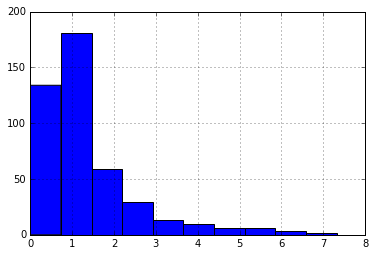

In [78]:
%matplotlib inline
full_data.mucus_viscosity.hist()

In [114]:
zingbi=ZeroInflatedNegativeBinomialP.from_formula("full_data.nosebleeds~full_data.mucus_viscosity\
                                                 +full_data.tissue_use+full_data.mucus_viscosity*full_data.arm",\
                                                  data=full_data, p=1).fit()
print(zingbi.summary2())
print (zingbi.aic)
print (zingbi.params)


         Current function value: 0.868522
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                              Results: ZeroInflatedNegativeBinomialP
Model:                     ZeroInflatedNegativeBinomialP        Pseudo R-squared:        0.024     
Dependent Variable:        full_data.nosebleeds                 AIC:                     779.5107  
Date:                      2018-08-18 21:38                     BIC:                     799.9786  
No. Observations:          443                                  Log-Likelihood:          -384.76   
Df Model:                  4                                    LL-Null:                 -394.41   
Df Residuals:              438                                  LLR p-value:             0.00068295
Converged:                 0.0000                               Scale:                   1.0000    
-------------------------------------------------------------------------------------------------

C:\python\pyLibs\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [175]:
endg=full_data.nosebleeds
exg=full_data[full_data.columns.difference(['nosebleeds','arm'])]

In [163]:
zingp=ZeroInflatedGeneralizedPoisson.from_formula("full_data.nosebleeds~full_data.mucus_viscosity+full_data.tissue_use \
                             +full_data.country+full_data.previous_year+C(full_data.arm)\
                             ",data=full_data).fit()
print (zingp.summary())
print("AIC:")
print (zingp.aic)

zingp.scale

Optimization terminated successfully.
         Current function value: 0.863373
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
                    ZeroInflatedGeneralizedPoisson Regression Results                     
Dep. Variable:               full_data.nosebleeds   No. Observations:                  443
Model:             ZeroInflatedGeneralizedPoisson   Df Residuals:                      437
Method:                                       MLE   Df Model:                            5
Date:                            Sat, 18 Aug 2018   Pseudo R-squ.:                 0.03045
Time:                                    23:22:40   Log-Likelihood:                -382.47
converged:                                   True   LL-Null:                       -394.49
                                                    LLR p-value:                 0.0002148
                                  coef    std err          z      P>|z|      [0.025      0.975]
----

1.0

In [111]:
full_data.drop(['subject'],axis=1,inplace=True)

In [149]:
from patsy import ModelDesc

In [155]:
desc = ModelDesc.from_formula("y ~ a + b + c + d+a*b")